# Computer Problem Set 1.2

### Danilo Marinho Fernandes

## Problem 1

(a) By the brownian motion definition, $\{A_i = W_{t^n_i} - W_{t^n_{i-1}}, i = 1, ..., 2^n\}$ is an i.i.d family where $A_i \sim \mathcal{N}(0, \Delta T)$, so that $Z_i = \frac{A_i}{\sqrt{\Delta T}} \sim \mathcal{N}(0,1)$.

(b)

In [1]:
import numpy as np
from matplotlib import pyplot as plt

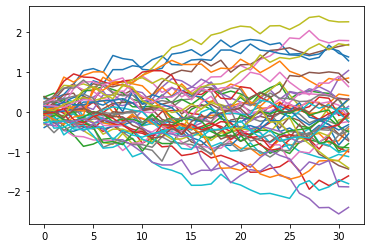

In [2]:
N = 1000
n = 5
T = 1
dT = 2**(-n) * T

Z = np.random.normal(0, 1, (N, 2**n))
W = np.cumsum(Z*np.sqrt(dT), axis=1)
_ = plt.plot(W[:50].T)

(c)

In [3]:
print("Sample mean:", np.mean(W[:,-1]))
print("Sample variance:", np.var(W[:,-1]))
print("Sample covariance of W_T, W_{T/2}:", np.cov(W[:,-1], W[:,2**(n-1)-1])[0][1])

Sample mean: -0.025483440827308315
Sample variance: 1.027713079927177
Sample covariance of W_T, W_{T/2}: 0.48791604205633415


## Problem 2

(a) We can recenter the Brownian motion at $s_1$:

$W_{\overline{s}} | (W_{s_1} = x_1, W_{s_2} = x_2) \sim x_1 + (W_{\overline{s}} - W_{s_1}) | (W_{s_1} = x_1, W_{s_2} = x_2) \sim x_1 + W_{\overline{s}-s_1} | (W_{s_2-s_1} = x_2-x_1)$

Which clearly has a guassian distribution. We can easily verify that $x_1 + \mathbb{E}[ W_{\overline{s}-s_1} | W_{s_2-s_1}]$ and $\mathbb{V}ar[W_{\overline{s}-s_1} | W_{s_2-s_1}]$ give respectively the mean and variance searched, at $W_{s_2-s_1} = x_2-x_1$.

(b) $W_{\overline{s}} | (W_{s_1} = x_1, W_{s_2} = x_2, (W_u)_{u \notin [s_1,s_2]})$ has the same law as

$$x_1 + (W_{\overline{s}} - W_{s_1}) | (W_{s_1} = x_1, W_{s_2} = x_2, (W_u)_{u \in [0,s_1]}, (W_u)_{u \in [s_2,\infty]})$$

By independence of $W_{\overline{s}} - W_{s_1}$ and $(W_u)_{u \in [0,s_1]}$, we can further simplify to

$$W_{\overline{s}} | (W_{s_1} = x_1, W_{s_2} = x_2, (W_u)_{u \in [s_2,\infty]})$$

By applying the same reasoning with $x_2 - (W_{s_2} - W_{\overline{s}})$ we find that the expression follows the same distribution as

$$W_{\overline{s}} | (W_{s_1} = x_1, W_{s_2} = x_2)$$

And we conclude by (a).

(c)

In [132]:
N = 1000
n = 5
T = 1

In [133]:
def set_values(values, N, T, n, s1, s2):
    """
    values: 2D array
    """
    if s2-s1 <= 1:
        return
    mid_time = (s1+s2)//2
    mean = (values[:, s1] + values[:, s2])/2
    std = np.sqrt((s2-s1)*T/(4*2**n))
    values[:, mid_time] = np.random.normal(mean, std*np.ones(N), N)
    set_values(values, N, T, n, s1, mid_time)
    set_values(values, N, T, n, mid_time, s2)
    return

In [134]:
W = np.zeros((N, 2**n+1))
W[:, -1] = np.random.normal(0, T, N)

In [135]:
set_values(W, N, T, n, 0, 2**n)

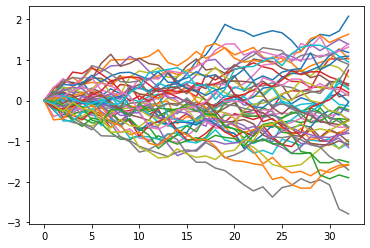

In [136]:
_ = plt.plot(W[:50].T)

(d)

In [137]:
print("Sample mean:", np.mean(W[:,-1]))
print("Sample variance:", np.var(W[:,-1]))
print("Sample covariance of W_T, W_{T/2}:", np.cov(W[:,-1], W[:,2**(n-1)-1])[0][1])

Sample mean: -0.016262471611919502
Sample variance: 0.970569725103752
Sample covariance of W_T, W_{T/2}: 0.45706702751984923


## Problem 3

## Comparison of the quadratic variation

In [138]:
N = 100
T = 1

In [139]:
def QV_forward(n):
    dT = 2**(-n) * T
    Z = np.random.normal(0, 1, (N, 2**n))
    diffs = Z*np.sqrt(dT)
    return np.mean(np.sum(diffs**2, axis=1))

In [140]:
def QV_backward(n):
    W = np.zeros((N, 2**n+1))
    W[:, -1] = np.random.normal(0, T, N)
    set_values(W, N, T, n, 0, 2**n)
    diffs = np.diff(W, axis=1)
    return np.mean(np.sum(diffs**2, axis=1))

In [141]:
QV_f, QV_b = [], []
for n in range(10,21):
    QV_f.append(QV_forward(n))
    QV_b.append(QV_backward(n))

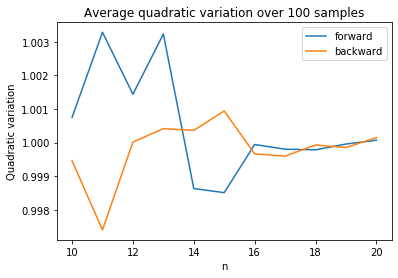

In [142]:
plt.plot(list(range(10,21)), QV_f)
plt.plot(list(range(10,21)), QV_b)
plt.title(f"Average quadratic variation over {N} samples")
plt.ylabel(f"Quadratic variation")
plt.xlabel("n")
plt.legend(["forward", "backward"])

# Inversion of the motion

#### using forward simulation

In [148]:
T = 1

C:\Users\DANILO\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


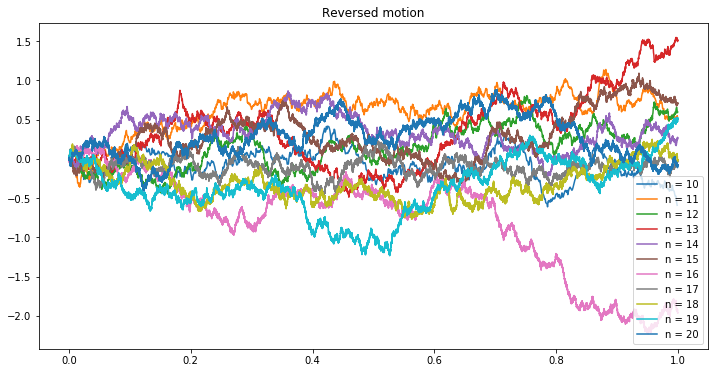

In [149]:
fig, ax = plt.subplots(figsize=(12,6))
for n in range(10, 21):
    dT = 2**(-n) * T
    Z = np.random.normal(0, 1, 2**n)
    W = np.cumsum(Z*np.sqrt(dT))
    plt.plot([i/2**n for i in range(2**n)], W[::-1]-W[-1])
plt.title("Reversed motion")
plt.legend([f"n = {i}" for i in range(10, 21)])

#### using backward simulation

C:\Users\DANILO\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


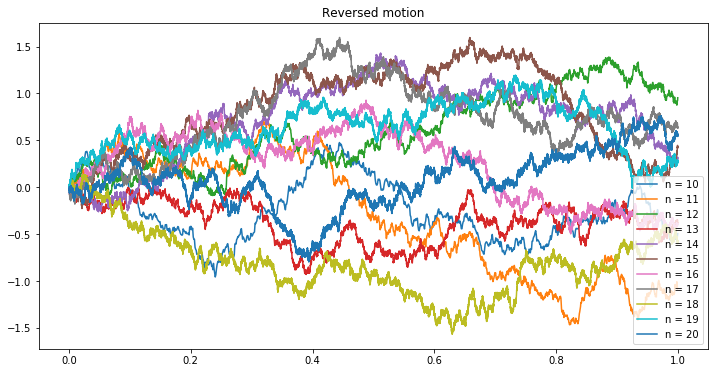

In [150]:
fig, ax = plt.subplots(figsize=(12,6))
for n in range(10, 21):
    W = np.zeros((1, 2**n+1))
    W[:, -1] = np.random.normal(0, T, 1)
    set_values(W, 1, T, n, 0, 2**n)
    plt.plot([i/2**n for i in range(2**n+1)], W[::-1][0]-W[-1][0])
plt.title("Reversed motion")
plt.legend([f"n = {i}" for i in range(10, 21)])